In [ ]:
#Steps
# Preprocess +EDA + Feature Selection
# Extract input and output cols
# Scale the values
# Train test split
# Train the model
# Evaluate the model/model selection
# Deploy the model

In [38]:
import numpy as np
import pandas as pd

In [39]:
df= pd.read_csv("placement.csv")
print(df)

    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [40]:
df.sample(10)

,Unnamed: 0,cgpa,iq,placement
52,52,7.0,175.0,1
58,58,8.0,79.0,1
84,84,5.7,169.0,0
19,19,5.2,132.0,0
53,53,8.3,168.0,1
92,92,5.2,110.0,0
24,24,4.7,121.0,0
14,14,6.1,103.0,0
27,27,6.0,124.0,1
76,76,4.9,155.0,0


In [41]:
df.shape

(100, 4)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [43]:
df= df.iloc[:,1:]  #rows,columns   column needed from 1
print(df)

    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


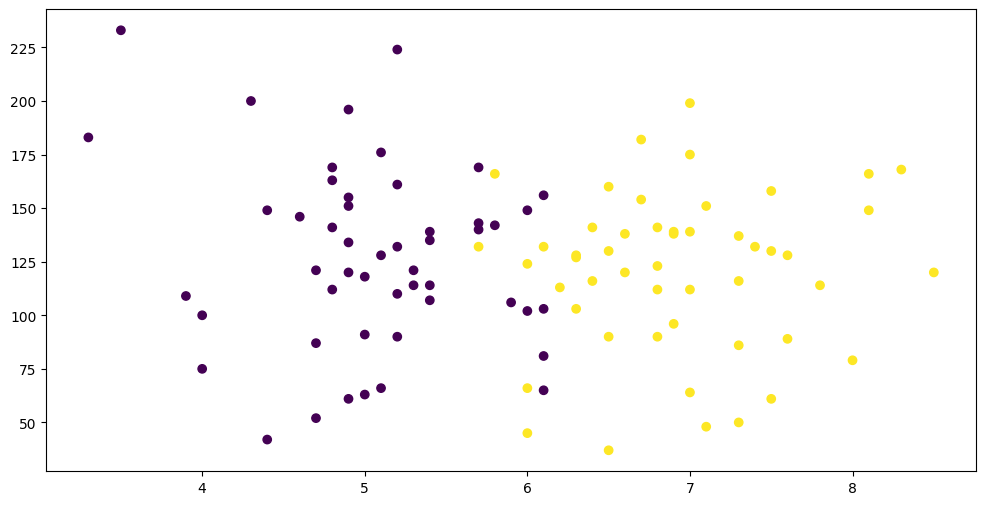

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(df['cgpa'], df['iq'], c= df['placement'])   #Controls the color of each point
plt.show()


In [45]:
X= df.iloc[:,0:2]
y= df.iloc[:,-1]

In [46]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [47]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# Traintest split


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.1)     #10% Data goes for test and 90% for training

In [50]:
X_train

,cgpa,iq
31,3.9,109.0
23,4.7,87.0
67,5.0,118.0
25,5.0,91.0
80,4.9,196.0
...,...,...
40,4.9,134.0
17,3.3,183.0
35,6.8,90.0
24,4.7,121.0


In [51]:
y_train

31    0
23    0
67    0
25    0
80    0
     ..
40    0
17    0
35    1
24    0
30    1
Name: placement, Length: 90, dtype: int64

In [52]:
X_test

,cgpa,iq
10,6.0,45.0
60,6.9,139.0
22,4.9,120.0
63,6.3,128.0
39,4.6,146.0
62,6.0,102.0
33,6.0,149.0
1,5.9,106.0
58,8.0,79.0
71,6.1,132.0


In [53]:
y_test

10    1
60    1
22    0
63    1
39    0
62    0
33    0
1     0
58    1
71    1
Name: placement, dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()     #It creates a scaler object — it doesn’t standardize anything yet.
X_train= scaler.fit_transform(X_train)   
#fit → The scaler learns the mean and standard deviation for each feature from X_train.
#transform → It applies the scaling to X_train so that each feature has mean ≈ 0 and std ≈ 1.
#After this, X_train is standardized.

In [62]:
X_train  #transformed test data

array([[-1.79303957, -0.38487191],
       [-1.10414496, -0.92841427],
       [-0.84580949, -0.16251367],
       [-0.84580949, -0.82958839],
       [-0.93192131,  1.76459105],
       [-0.50136218,  0.25749633],
       [-0.84580949, -1.52136957],
       [ 0.53197972, -0.11310073],
       [ 0.96253885, -1.89196663],
       [ 0.10142059,  0.77633222],
       [ 0.70420337, -0.3107525 ],
       [-1.01803314,  1.09751634],
       [-0.50136218,  0.35632221],
       [-0.67358583, -0.36016544],
       [-0.24302671,  0.38102868],
       [ 0.61809155,  0.72691928],
       [-0.50136218, -0.43428485],
       [ 1.1347625 , -0.21192662],
       [ 0.70420337,  0.40573515],
       [-1.01803314,  0.40573515],
       [ 0.18753242, -0.28604603],
       [ 0.96253885,  0.65279986],
       [-0.67358583,  2.45637223],
       [ 0.27364425, -0.53311074],
       [ 0.4458679 ,  0.8751581 ],
       [ 0.35975607,  0.40573515],
       [ 0.87642702,  0.35632221],
       [ 0.35975607, -0.21192662],
       [-0.67358583,

In [56]:
X_test= scaler.transform(X_test)
#The scaler does not learn new statistics.
#It uses the mean and std from the training data to scale X_test.
#This ensures the test data is on the same scale as the training data, which is essential for fair evaluation.


# If you fit on test data, the scaler would compute a new mean and std, which:
# Changes the scale differently than the training data.
# Leaks information from the test set into your preprocessing → your evaluation is no longer realistic.

In [ ]:
X_test

# Train the model


In [66]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()  # creating object of Logistic Regression called classifier
# Model Training
clf.fit(X_train, y_train)  # trains the model using the training data.

# Your model is trained and ready to make predictions on new/unseen data.

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [67]:
y_pred= clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [68]:
y_test

10    1
60    1
22    0
63    1
39    0
62    0
33    0
1     0
58    1
71    1
Name: placement, dtype: int64

# Checking model accuracy


In [69]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, y_pred)

0.8

# What ML model saw

In [75]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

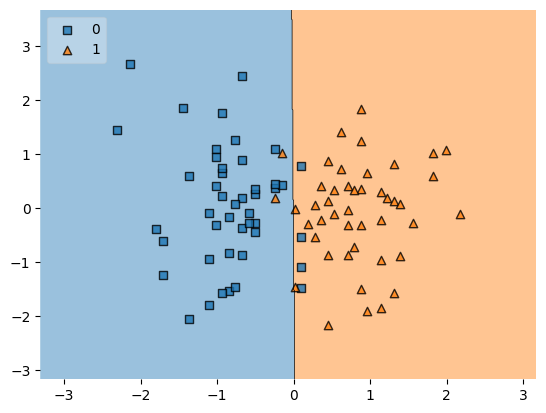

In [81]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)